In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Ingestion des données

In [2]:
portfolio = pd.read_excel('BI WIP.xlsx', index_col = 0, sheet_name='portfolio')
benchmark = pd.read_excel('BI WIP.xlsx', index_col = 0, sheet_name='benchmark')
portfolio.iloc[0,1] = np.nan
benchmark.iloc[0,1] = np.nan

Définitions de quelques listes de sélection utiles :

In [3]:
X_portfolio = portfolio.iloc[0,2:22].index.values
P_portfolio = portfolio.iloc[0,22:42].index.values
R_portfolio = portfolio.iloc[0,42:62].index.values

In [112]:
X_portfolio #a titre d'exemple

array(['X_Life Technologies Corp', 'X_MOSAIC CO/THE', 'X_CAMECO CORP',
       "X_People's United Financial Inc", 'X_BRISTOL-MYERS SQUIBB CO',
       'X_CBRE Group Inc', 'X_CAMPBELL SOUP CO', 'X_FEDEX CORP',
       'X_SAGE GROUP PLC/THE', 'X_SEGRO PLC', 'X_A2A SpA',
       'X_VOLKSWAGEN AG-PREF', 'X_SANDVIK AB',
       'X_Liberty Global A-Equity', 'X_SAMSUNG ELECTRO-MECHANICS CO',
       'X_TAISHIN FINANCIAL HOLDING', 'X_Kewpie Corp',
       'X_ANHUI CONCH CEMENT CO LTD-H', 'X_MODEC INC', 'X_Baidu Inc'],
      dtype=object)

### Calcul des contributions sur la dernière année

Définion du jeu de données qui nous intéresse (ytd = "year to date")

In [5]:
portfolio.tail(1).index.values

array(['2019-03-12'], dtype=object)

In [6]:
date_ytd = '2018-03-13'
ytd = portfolio.loc[date_ytd:,:]

Visualisation des données afin de vérifier la cohérence de nos résultats par la suite.

*Commentaire sur le graphique:* CBRE a un spike en un jour en 2018 qui ne semble pas avéré après une recherche en ligne. Mais si nous avons fait de notre mieux il semble que des données erronnées soient encore présentes dans a base.


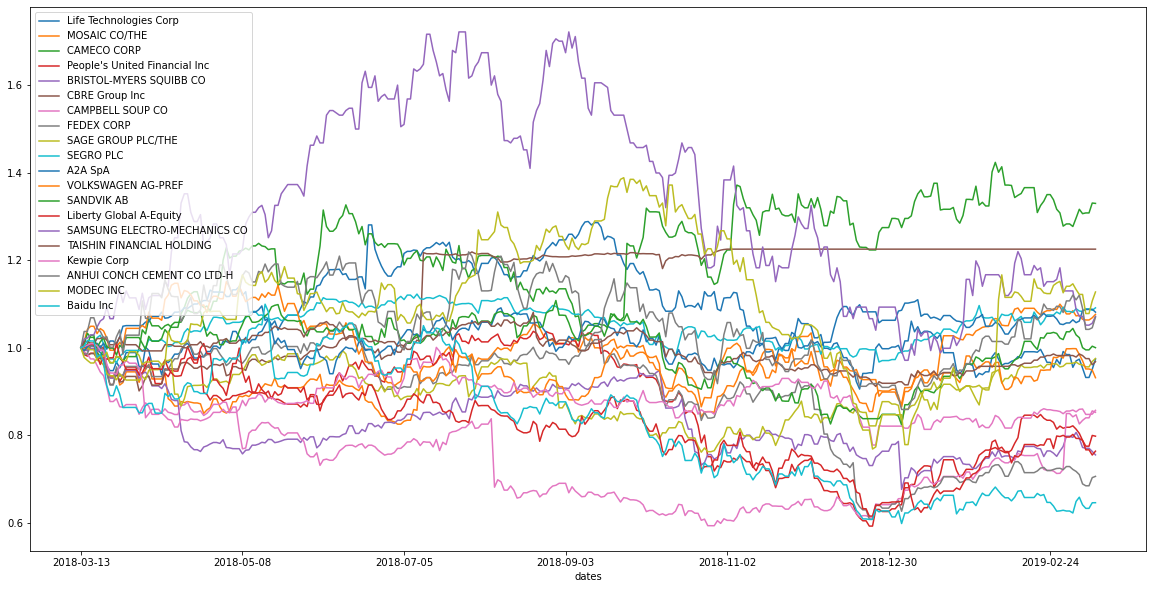

In [7]:
ytd[P_portfolio].apply(lambda x : x/float(x.iloc[0])).plot(figsize=(20,10))

In [8]:
ytd.iloc[0,42:62] = np.nan# Au temps 0, nous considérons qu'il n'y a pas de rentabilité connue.
ytd.iloc[0,1] = np.nan

C:\Users\1s2ad\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


**Calcul des rentabilités sur l'année :**

In [9]:
pyield = ytd[R_portfolio][1:].apply(lambda x : 1+x).prod() - 1; 
#print(pyield.sort_values(ascending = False))
#top5_yield = pyield.head(5); print(top5_yield)
#bottom5_yield = pyield.tail(5); print(bottom5_yield)

In [10]:
contrib = ytd[X_portfolio].iloc[0,:].to_frame(name='poids initiaux')

In [11]:
contrib['poids finaux'] = ytd[X_portfolio].iloc[-1,:]

In [12]:
contrib.index = contrib.index.map(lambda x : x[2:])

In [13]:
contrib['performance'] = pyield.values

In [14]:
contrib['contribution'] = contrib['poids initiaux']*contrib.performance

In [15]:
contrib

,poids initiaux,poids finaux,performance,contribution
Life Technologies Corp,0.043747,0.044307,-0.026030,-0.001139
MOSAIC CO/THE,0.046548,0.052100,0.076350,0.003554
CAMECO CORP,0.021097,0.029172,0.329707,0.006956
People's United Financial Inc,0.035616,0.029565,-0.201734,-0.007185
BRISTOL-MYERS SQUIBB CO,0.048939,0.038450,-0.244451,-0.011963
CBRE Group Inc,0.053868,0.068634,0.225255,0.012134
CAMPBELL SOUP CO,0.048568,0.043069,-0.147232,-0.007151
FEDEX CORP,0.065988,0.048480,-0.293496,-0.019367
SAGE GROUP PLC/THE,0.004536,0.004602,-0.024348,-0.000110
SEGRO PLC,0.041223,0.046779,0.091270,0.003762


**Résultat de notre calcul de contribution affiché de manière ordonnée**

In [16]:
print(contrib.sort_values('contribution', ascending=False))

                               poids initiaux  poids finaux  performance  \
CBRE Group Inc                       0.053868      0.068634     0.225255   
A2A SpA                              0.122939      0.138253     0.081446   
CAMECO CORP                          0.021097      0.029172     0.329707   
SAMSUNG ELECTRO-MECHANICS CO         0.095590      0.106539     0.071806   
MODEC INC                            0.035622      0.041765     0.127469   
SEGRO PLC                            0.041223      0.046779     0.091270   
MOSAIC CO/THE                        0.046548      0.052100     0.076350   
ANHUI CONCH CEMENT CO LTD-H          0.044000      0.048948     0.069795   
SANDVIK AB                           0.052813      0.054938     0.000336   
SAGE GROUP PLC/THE                   0.004536      0.004602    -0.024348   
TAISHIN FINANCIAL HOLDING            0.030872      0.031085    -0.031690   
Life Technologies Corp               0.043747      0.044307    -0.026030   
VOLKSWAGEN A

### Exposition, contribution par secteur et par pays

In [17]:
mapping = pd.read_csv('actifs_dico.csv', index_col=0)

In [18]:
df = contrib.copy()

In [19]:
df = df.join(mapping,how='left')

*Par secteur **et** par pays **avec** sous-totaux*

In [20]:
pd.pivot_table(df,values='poids finaux',index='Sector', columns='Country',\
               aggfunc=np.sum, fill_value=0, margins=True)

Country,CANADA,CHINA,GERMANY,ITALY,JAPAN,SOUTH KOREA,SWEDEN,TAIWAN,UNITED KINGDOM,UNITED STATES,All
Sector,,,,,,,,,,,
Communication Services,0.000000,0.044011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017934,0.000000,0.061945
Consumer Discretionary,0.000000,0.000000,0.055169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055169
Consumer Staples,0.000000,0.000000,0.000000,0.000000,0.056201,0.000000,0.000000,0.000000,0.000000,0.043069,0.099270
Energy,0.029172,0.000000,0.000000,0.000000,0.041765,0.000000,0.000000,0.000000,0.000000,0.000000,0.070937
Financials,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031085,0.000000,0.029565,0.060650
Health Care,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082758,0.082758
Industrials,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054938,0.000000,0.000000,0.048480,0.103417
Information Technology,0.000000,0.000000,0.000000,0.000000,0.000000,0.106539,0.000000,0.000000,0.004602,0.000000,0.111140
Materials,0.000000,0.048948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052100,0.101048


*Par secteur **et** par pays **sans** sous-totaux*

In [21]:
df.groupby(by=['Sector','Country']).sum()

poids initiaux  poids finaux  \
Sector                 Country                                        
Communication Services CHINA                 0.065479      0.044011   
                       UNITED KINGDOM        0.022573      0.017934   
Consumer Discretionary GERMANY               0.056937      0.055169   
Consumer Staples       JAPAN                 0.063043      0.056201   
                       UNITED STATES         0.048568      0.043069   
Energy                 CANADA                0.021097      0.029172   
                       JAPAN                 0.035622      0.041765   
Financials             TAIWAN                0.030872      0.031085   
                       UNITED STATES         0.035616      0.029565   
Health Care            UNITED STATES         0.092686      0.082758   
Industrials            SWEDEN                0.052813      0.054938   
                       UNITED STATES         0.065988      0.048480   
Information Technology SOUTH KOREA           0.095590      0.106539   
                       UNITED KINGDOM        0.004536      0.004602   
Materials              CHINA                 0.044000      0.048948   
                       UNITED STATES         0.046548      0.052100   
Real Estate            UNITED KINGDOM        0.041223      0.046779   
                       UNITED STATES         0.053868      0.068634   
Utilities              ITALY                 0.122939      0.138253   

                                       performance  contribution  
Sector                 Country                                    
Communication Services CHINA             -0.353629     -0.023155  
                       UNITED KINGDOM    -0.235955     -0.005326  
Consumer Discretionary GERMANY           -0.068211     -0.003884  
Consumer Staples       JAPAN             -0.142714     -0.008997  
                       UNITED STATES     -0.147232     -0.007151  
Energy                 CANADA             0.329707      0.006956  
                       JAPAN              0.127469      0.004541  
Financials             TAIWAN            -0.031690     -0.000978  
                       UNITED STATES     -0.201734     -0.007185  
Health Care            UNITED STATES     -0.270481     -0.013102  
Industrials            SWEDEN             0.000336      0.000018  
                       UNITED STATES     -0.293496     -0.019367  
Information Technology SOUTH KOREA        0.071806      0.006864  
                       UNITED KINGDOM    -0.024348     -0.000110  
Materials              CHINA              0.069795      0.003071  
                       UNITED STATES      0.076350      0.003554  
Real Estate            UNITED KINGDOM     0.091270      0.003762  
                       UNITED STATES      0.225255      0.012134  
Utilities              ITALY              0.081446      0.010013

*Par secteur **uniquement**.*

In [22]:
df.groupby(by=['Sector']).sum()

,poids initiaux,poids finaux,performance,contribution
Sector,,,,
Communication Services,0.088051,0.061945,-0.589584,-0.028481
Consumer Discretionary,0.056937,0.055169,-0.068211,-0.003884
Consumer Staples,0.111612,0.099270,-0.289946,-0.016148
Energy,0.056720,0.070937,0.457176,0.011497
Financials,0.066488,0.060650,-0.233424,-0.008163
Health Care,0.092686,0.082758,-0.270481,-0.013102
Industrials,0.118802,0.103417,-0.293160,-0.019350
Information Technology,0.100125,0.111140,0.047458,0.006753
Materials,0.090548,0.101048,0.146146,0.006625


*Par pays **uniquement**.*

In [23]:
df.groupby(by=['Country']).sum()

,poids initiaux,poids finaux,performance,contribution
Country,,,,
CANADA,0.021097,0.029172,0.329707,0.006956
CHINA,0.109479,0.092959,-0.283833,-0.020084
GERMANY,0.056937,0.055169,-0.068211,-0.003884
ITALY,0.122939,0.138253,0.081446,0.010013
JAPAN,0.098666,0.097966,-0.015245,-0.004456
SOUTH KOREA,0.095590,0.106539,0.071806,0.006864
SWEDEN,0.052813,0.054938,0.000336,0.000018
TAIWAN,0.030872,0.031085,-0.031690,-0.000978
UNITED KINGDOM,0.068331,0.069315,-0.169033,-0.001674


### Répartition de la performance et de la volatilité par zones géographique et par secteurs d’activité, puis par pays et par industrie

In [25]:
ytd[R_portfolio]

,R_Life Technologies Corp,R_MOSAIC CO/THE,R_CAMECO CORP,R_People's United Financial Inc,R_BRISTOL-MYERS SQUIBB CO,R_CBRE Group Inc,R_CAMPBELL SOUP CO,R_FEDEX CORP,R_SAGE GROUP PLC/THE,R_SEGRO PLC,R_A2A SpA,R_VOLKSWAGEN AG-PREF,R_SANDVIK AB,R_Liberty Global A-Equity,R_SAMSUNG ELECTRO-MECHANICS CO,R_TAISHIN FINANCIAL HOLDING,R_Kewpie Corp,R_ANHUI CONCH CEMENT CO LTD-H,R_MODEC INC,R_Baidu Inc
dates,,,,,,,,,,,,,,,,,,,,
2018-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-14,0.002874,-0.006752,-0.008368,-0.015498,-0.000750,-0.011856,-0.008651,-0.015393,-0.001449,0.004299,-0.006421,0.014108,0.008392,0.000911,0.020063,0.014085,0.002674,0.037304,-0.021990,0.003871
2018-03-15,-0.010032,0.004183,0.016034,-0.003469,-0.005703,-0.004185,-0.006108,0.001985,0.000871,0.003293,0.008503,0.027441,0.024634,0.006371,0.002070,0.000000,0.003333,0.000000,-0.006860,0.012955
2018-03-16,0.011259,0.013019,0.020764,0.006693,0.005283,0.002802,-0.010887,0.018715,-0.003770,-0.001641,0.006745,0.006957,-0.009097,-0.000301,0.007231,-0.003472,0.003322,0.030162,-0.006140,-0.001218
2018-03-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-07,-0.020984,-0.008222,-0.007629,-0.019912,-0.026092,0.000000,0.009843,-0.029857,-0.001807,-0.000915,0.022293,-0.014719,-0.022310,-0.005362,0.000000,-0.003571,0.000778,-0.026853,0.000000,-0.026551
2019-03-08,-0.022438,-0.001463,0.001281,-0.016819,-0.002330,0.000000,0.007051,-0.006248,-0.004525,0.005496,0.002492,-0.019208,-0.005034,-0.027339,-0.018719,-0.007168,-0.014375,-0.044150,-0.038870,-0.012491
2019-03-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
portfolio_mapping = mapping.loc[P_portfolio,:]
portfolio_mapping

,Geographical_zone,Country,Sector,Industry
Name,,,,
Life Technologies Corp,NORTH AMERICA,UNITED STATES,Health Care,Biotechnology
MOSAIC CO/THE,NORTH AMERICA,UNITED STATES,Materials,Chemicals
CAMECO CORP,NORTH AMERICA,CANADA,Energy,"Oil, Gas & Consumable Fuels"
People's United Financial Inc,NORTH AMERICA,UNITED STATES,Financials,Banks
BRISTOL-MYERS SQUIBB CO,NORTH AMERICA,UNITED STATES,Health Care,Pharmaceuticals
CBRE Group Inc,NORTH AMERICA,UNITED STATES,Real Estate,Real Estate Management & Devel
CAMPBELL SOUP CO,NORTH AMERICA,UNITED STATES,Consumer Staples,Food Products
FEDEX CORP,NORTH AMERICA,UNITED STATES,Industrials,Air Freight & Logistics
SAGE GROUP PLC/THE,EUROPE,UNITED KINGDOM,Information Technology,Software


#### Test de faisabilité pour la zone EU

In [27]:
zone = portfolio_mapping.Geographical_zone.drop_duplicates().values;print(zone)
secteur = portfolio_mapping.Sector.drop_duplicates()
pays = portfolio_mapping.Country.drop_duplicates()
industrie = portfolio_mapping.Industry.drop_duplicates()

['NORTH AMERICA' 'EUROPE' 'ASIA/PACIFIC']


In [28]:
EU = zone[1]

In [29]:
EU_securities = portfolio_mapping[portfolio_mapping.Geographical_zone==EU].index.values

In [30]:
EU_perf = df.loc[EU_securities,'performance'].sum()

In [64]:
covar = pd.read_excel('portfolio.xlsx', sheet_name='Matrice Variance-Covariance', index_col=0)
covar_pondere = covar*df['poids initiaux'].values.transpose()*df['poids initiaux'].values

In [65]:
EU_var = covar_pondere[EU_securities].loc[EU_securities].sum().sum()

In [66]:
print(EU_perf)
print(EU_var)

-0.1554621580670742
6.22015434375683e-06


In [67]:
EU_var

6.22015434375683e-06

In [69]:
covar_pondere[EU_securities].loc[EU_securities]

,SAGE GROUP PLC/THE,SEGRO PLC,A2A SpA,VOLKSWAGEN AG-PREF,SANDVIK AB,Liberty Global A-Equity
SAGE GROUP PLC/THE,7.236849e-07,2.987737e-08,7.167694e-08,9.791746e-08,1.512164e-07,5.703101e-08
SEGRO PLC,2.330502e-07,6.662256e-08,9.646160e-08,8.253647e-08,1.172244e-07,6.153336e-08
A2A SpA,1.488531e-07,2.568183e-08,4.302581e-07,1.063159e-07,1.247806e-07,5.874535e-08
VOLKSWAGEN AG-PREF,3.066820e-07,3.314110e-08,1.603422e-07,4.830825e-07,3.014121e-07,1.129636e-07
SANDVIK AB,2.773757e-07,2.756642e-08,1.102143e-07,1.765232e-07,5.255499e-07,7.756830e-08
Liberty Global A-Equity,1.786882e-07,2.471659e-08,8.862982e-08,1.130044e-07,1.324951e-07,4.067311e-07


#### Code final (modifié pour prendre en compte les pondérations)

*Zones géographiques*

In [81]:
zone = portfolio_mapping.Geographical_zone.drop_duplicates().values;print(zone)

['NORTH AMERICA' 'EUROPE' 'ASIA/PACIFIC']


In [72]:
data_zone = {'Zone':[],
            'Contribution':[],
            'Variance':[]}

for zones in zone:
    securities = portfolio_mapping[portfolio_mapping.Geographical_zone==zones].index.values
    perf = df.loc[securities,'contribution'].sum()
    var = covar_pondere[securities].loc[securities].sum().sum()
    data_zone['Zone'].append(zones)
    data_zone['Contribution'].append(perf)
    data_zone['Variance'].append(var)
    

In [73]:
df_zone = pd.DataFrame(data_zone)
df_zone.set_index('Zone')

,Contribution,Variance
Zone,,
NORTH AMERICA,-0.024161,0.000027
EUROPE,0.004473,0.000006
ASIA/PACIFIC,-0.018655,0.000008


In [79]:
df_zone.Contribution.sum() #sanity check, correspond bien à la contribution au global

-0.03834319103621579

*Secteur d'activité*

In [82]:
sector = portfolio_mapping.Sector.drop_duplicates().values;print(sector)

['Health Care' 'Materials' 'Energy' 'Financials' 'Real Estate'
 'Consumer Staples' 'Industrials' 'Information Technology' 'Utilities'
 'Consumer Discretionary' 'Communication Services']


In [87]:
data_secteur = {'Sector':[],
            'Contribution':[],
            'Variance':[]}

for sectors in sector:
    securities = portfolio_mapping[portfolio_mapping.Sector==sectors].index.values
    perf = df.loc[securities,'contribution'].sum()
    var = covar_pondere[securities].loc[securities].sum().sum()
    data_secteur['Sector'].append(sectors)
    data_secteur['Contribution'].append(perf)
    data_secteur['Variance'].append(var)
    

In [88]:
df_secteur = pd.DataFrame(data_secteur)
df_secteur.set_index('Sector')

,Contribution,Variance
Sector,,
Health Care,-0.013102,5.654845e-06
Materials,0.006625,1.212607e-06
Energy,0.011497,1.605939e-06
Financials,-0.008163,2.563853e-06
Real Estate,0.015896,4.954927e-07
Consumer Staples,-0.016148,1.399789e-06
Industrials,-0.019350,1.695988e-06
Information Technology,0.006753,8.580073e-07
Utilities,0.010013,4.302581e-07


In [89]:
df_secteur.Contribution.sum() #sanity check, correspond bien à la contribution au global

-0.03834319103621579

*Pays*

In [90]:
country = portfolio_mapping.Country.drop_duplicates().values;print(country)

['UNITED STATES' 'CANADA' 'UNITED KINGDOM' 'ITALY' 'GERMANY' 'SWEDEN'
 'SOUTH KOREA' 'TAIWAN' 'JAPAN' 'CHINA']


In [101]:
data_country = {'Pays':[],
            'Contribution':[],
            'Variance':[]}

for countries in country:
    securities = portfolio_mapping[portfolio_mapping.Country==countries].index.values
    perf = df.loc[securities,'contribution'].sum()
    var = covar_pondere[securities].loc[securities].sum().sum()
    data_country['Pays'].append(countries)
    data_country['Contribution'].append(perf)
    data_country['Variance'].append(var)
    

In [102]:
df_country = pd.DataFrame(data_country)
df_country.set_index('Pays')

,Contribution,Variance
Pays,,
UNITED STATES,-0.031117,2.280810e-05
CANADA,0.006956,1.072770e-06
UNITED KINGDOM,-0.001674,1.781935e-06
ITALY,0.010013,4.302581e-07
GERMANY,-0.003884,4.830825e-07
SWEDEN,0.000018,5.255499e-07
SOUTH KOREA,0.006864,1.034758e-08
TAIWAN,-0.000978,9.966437e-07
JAPAN,-0.004456,1.350245e-06


In [110]:
df_country.Contribution.sum() #sanity check, correspond bien à la contribution au global

-0.03834319103621579

*Industrie*

In [104]:
industry = portfolio_mapping.Industry.drop_duplicates().values;print(industry)

['Biotechnology' 'Chemicals' 'Oil, Gas & Consumable Fuels' 'Banks'
 'Pharmaceuticals' 'Real Estate Management & Devel' 'Food Products'
 'Air Freight & Logistics' 'Software' 'Equity Real Estate Investment'
 'Multi-Utilities' 'Automobiles' 'Machinery' 'Media'
 'Electronic Equipment, Instrume' 'Construction Materials'
 'Energy Equipment & Services' 'Interactive Media & Services']


In [107]:
data_industry = {'Industrie':[],
            'Contribution':[],
            'Variance':[]}

for industries in industry:
    securities = portfolio_mapping[portfolio_mapping.Industry==industries].index.values
    perf = df.loc[securities,'contribution'].sum()
    var = covar_pondere[securities].loc[securities].sum().sum()
    data_industry['Industrie'].append(industries)
    data_industry['Contribution'].append(perf)
    data_industry['Variance'].append(var)
    

In [108]:
df_industry = pd.DataFrame(data_industry)
df_industry.set_index('Industrie')

,Contribution,Variance
Industrie,,
Biotechnology,-0.001139,4.752050e-06
Chemicals,0.003554,3.877881e-07
"Oil, Gas & Consumable Fuels",0.006956,1.072770e-06
Banks,-0.008163,2.563853e-06
Pharmaceuticals,-0.011963,1.030144e-07
Real Estate Management & Devel,0.012134,3.567955e-07
Food Products,-0.016148,1.399789e-06
Air Freight & Logistics,-0.019367,7.745711e-07
Software,-0.000110,7.236849e-07


In [111]:
df_industry.Contribution.sum() #sanity check, correspond bien à la contribution au global

-0.038343191036215786

### Espace test

In [ ]:
df.contribution.sum()

In [ ]:
(contrib['poids finaux']*contrib.performance).sum()

In [ ]:
print((ytd.portfolio_R.apply(lambda x: 1+x).cumprod()).iloc[-1]-1)
(ytd.portfolio_R.apply(lambda x: 1+x).cumprod()).plot()

In [ ]:
test = ytd.portfolio_R.to_frame()

In [ ]:
test.rename(columns = {'portfolio_R': 'R'}, inplace=True)

In [ ]:
test.iloc[0,0] = np.nan
test

In [ ]:
test['V']= df.R.apply(lambda x: 1+x).cumprod()

In [ ]:
test.iloc[0,1] = 1

In [ ]:
a = ytd.iloc[0,:].loc[X_portfolio]#.div(ytd.iloc[0,:].loc[P_portfolio])

In [ ]:
b = ytd.iloc[0,:].loc[P_portfolio]

In [ ]:
a.index = b.index.values

In [ ]:
a

In [ ]:
b

In [ ]:
N = a/b
N

In [ ]:
(N*b).sum()

In [ ]:
(ytd.loc[:,P_portfolio]*N).sum(axis=1)

In [ ]:
test.rename(columns={'R': 'R_excel', 'V': 'V_deduite_excel'}, inplace=True)

In [ ]:
test['V_recalculee'] = (ytd.loc[:,P_portfolio]*N).sum(axis=1)

In [ ]:
test

In [ ]:
test.iloc[:,1:].plot(figsize=(10,5))